<a href="https://colab.research.google.com/github/Manoj-Kumar22/IIITH_Aiml_Labwork/blob/main/AIML_Project_Module_5_AIML20230106_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression analysis on a COVID-dataset


In this project, we will use the concepts of regression and regularization we have learnt to predict early Covid-19 cases. We shall use linear regression, polynomial regression and ridge regression to obtain a reasonably good estimate of the future cases. Try experimenting with hyperparameters to obtain better results.

## Data Analysis

### 1. **Load the data** into a pandas dataframe.

In [2]:
# Imports
import pandas as pd
import numpy  as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

import copy
from   sklearn.metrics       import mean_squared_error, mean_absolute_error
from   sklearn.linear_model  import LinearRegression, BayesianRidge
from   sklearn.tree          import DecisionTreeRegressor
from   sklearn.preprocessing import PolynomialFeatures

In [3]:
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
print(df_orig)
df_orig.head()

         SNo ObservationDate Province/State  Country/Region  \
0          1      01/22/2020          Anhui  Mainland China   
1          2      01/22/2020        Beijing  Mainland China   
2          3      01/22/2020      Chongqing  Mainland China   
3          4      01/22/2020         Fujian  Mainland China   
4          5      01/22/2020          Gansu  Mainland China   
...      ...             ...            ...             ...   
10666  10667      03/31/2020        Wyoming              US   
10667  10668      03/31/2020       Xinjiang  Mainland China   
10668  10669      03/31/2020          Yukon          Canada   
10669  10670      03/31/2020         Yunnan  Mainland China   
10670  10671      03/31/2020       Zhejiang  Mainland China   

               Last Update  Confirmed  Deaths  Recovered  
0          1/22/2020 17:00        1.0     0.0        0.0  
1          1/22/2020 17:00       14.0     0.0        0.0  
2          1/22/2020 17:00        6.0     0.0        0.0  
3      

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [4]:
df = copy.deepcopy(df_orig)
df.drop('Last Update',inplace=True,axis=1)
date_lst  = df.ObservationDate.unique()
date_dict = {}

for i in range(len(date_lst)):
    df_temp = df.loc[df['ObservationDate'] == date_lst[i]]
    date_dict[date_lst[i]] = df_temp


In [5]:
date_tot_tup_dict = {};
for date, df in date_dict.items():
    tup_temp = (df['Confirmed'].sum(), df['Deaths'].sum(), df['Recovered'].sum())
    date_tot_tup_dict[date] = tup_temp


In [6]:
print(date_tot_tup_dict)

{'01/22/2020': (555.0, 17.0, 28.0), '01/23/2020': (653.0, 18.0, 30.0), '01/24/2020': (941.0, 26.0, 36.0), '01/25/2020': (1438.0, 42.0, 39.0), '01/26/2020': (2118.0, 56.0, 52.0), '01/27/2020': (2927.0, 82.0, 61.0), '01/28/2020': (5578.0, 131.0, 107.0), '01/29/2020': (6165.0, 133.0, 126.0), '01/30/2020': (8235.0, 171.0, 143.0), '01/31/2020': (9925.0, 213.0, 222.0), '02/01/2020': (12038.0, 259.0, 284.0), '02/02/2020': (16787.0, 362.0, 472.0), '02/03/2020': (19881.0, 426.0, 623.0), '02/04/2020': (23892.0, 492.0, 852.0), '02/05/2020': (27636.0, 564.0, 1124.0), '02/06/2020': (30818.0, 634.0, 1487.0), '02/07/2020': (34392.0, 719.0, 2011.0), '02/08/2020': (37121.0, 806.0, 2616.0), '02/09/2020': (40151.0, 906.0, 3244.0), '02/10/2020': (42763.0, 1013.0, 3946.0), '02/11/2020': (44803.0, 1113.0, 4683.0), '02/12/2020': (45222.0, 1118.0, 5150.0), '02/13/2020': (60370.0, 1371.0, 6295.0), '02/14/2020': (66887.0, 1523.0, 8058.0), '02/15/2020': (69032.0, 1666.0, 9395.0), '02/16/2020': (71226.0, 1770.0, 

In [7]:
df_date_tots = pd.DataFrame(date_tot_tup_dict)
df_date_tots = df_date_tots.transpose()
df_date_tots.columns = ['Confirmed', 'Deaths', 'Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
01/22/2020      555.0    17.0       28.0
01/23/2020      653.0    18.0       30.0
01/24/2020      941.0    26.0       36.0
01/25/2020     1438.0    42.0       39.0
01/26/2020     2118.0    56.0       52.0


### 3. Create a new column in the dataframe called **“closed cases”**

In [8]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 4. Create a new column in the dataframe called “active cases”

In [9]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 5. **Plot** the total number of cases per day over time and summarize findings

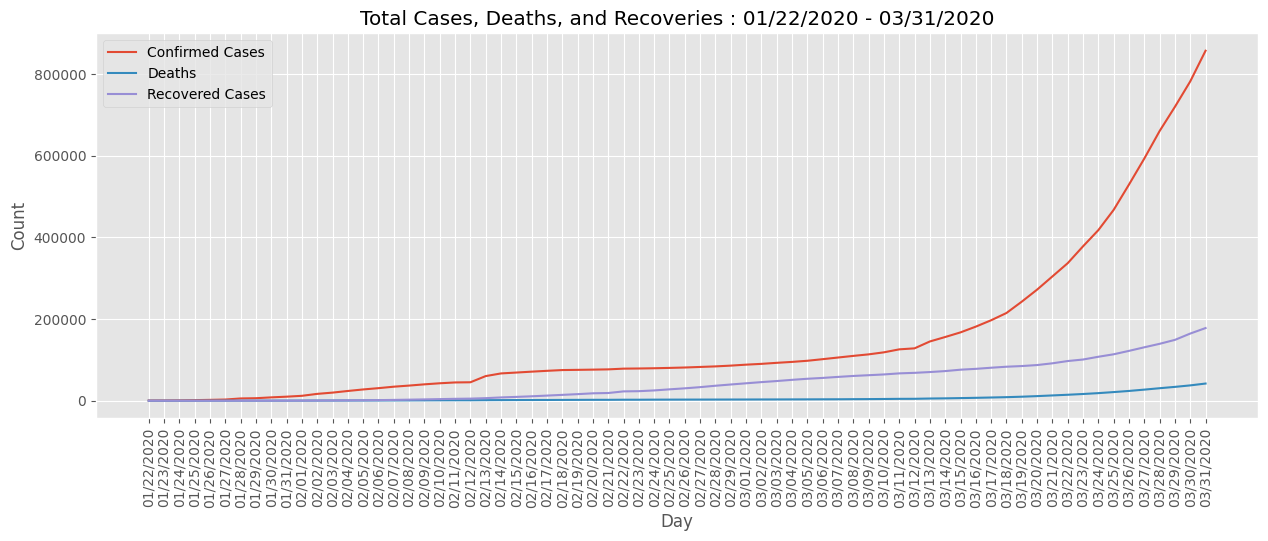

In [10]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Confirmed'], label = "Confirmed Cases")
plt.plot(df_date_tots['Deaths'], label    = "Deaths")
plt.plot(df_date_tots['Recovered'], label = "Recovered Cases")

plt.legend()
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90);
start_date = str(date_lst[0]);
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);


All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 6. Create one **plot** showing the trend of number of active cases and closed cases

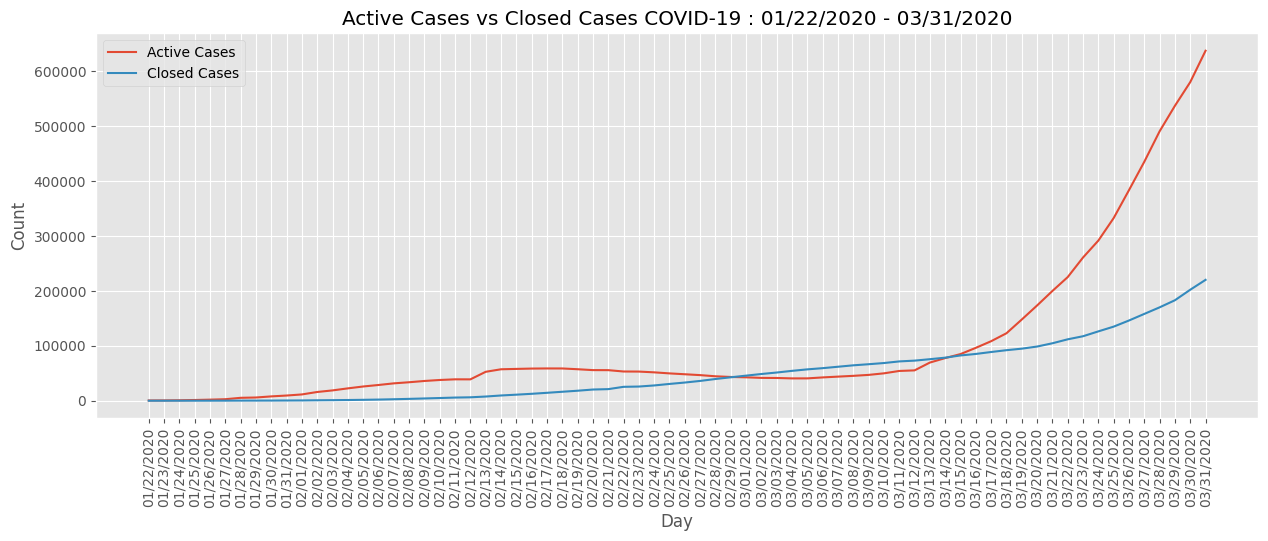

In [11]:
plt.figure(figsize = [15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")

plt.legend();
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

**Growth factor** is the factor by which a quantity multiplies itself over time. In the below cell, we calculate the GF of the confirmed, recovered and death cases.


In [12]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i]
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i]
    recovGF_lst.append(recoveredGF);


### 8. Create one plot showing the Growth factor of confirmed, recovered and death cases wrt days

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 01/22/2020 - 03/31/2020')

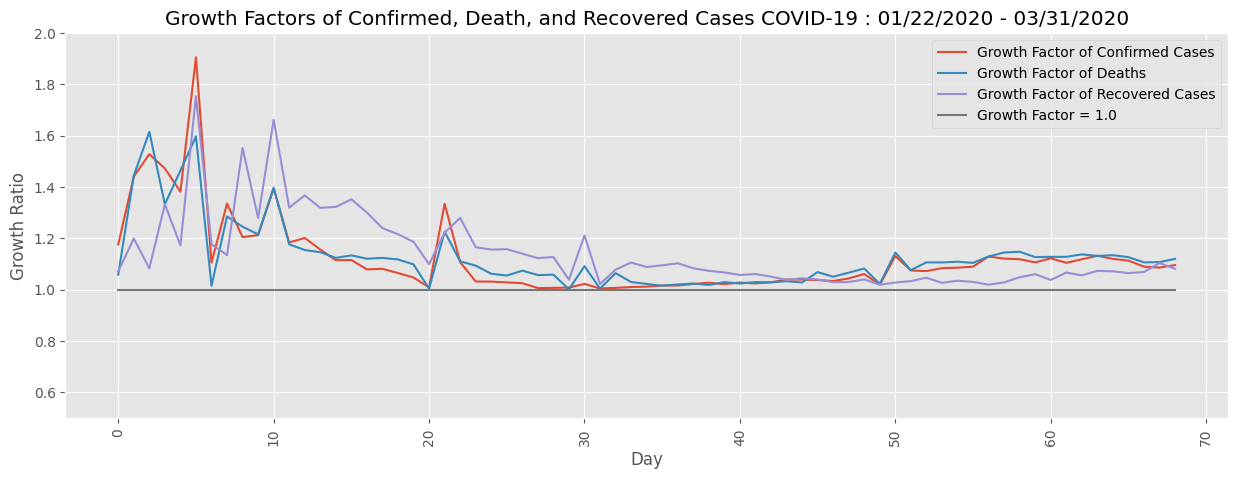

In [13]:
plt.figure(figsize = [15,5])
plt.plot(confGF_lst, label = "Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label = "Growth Factor of Deaths")
plt.plot(recovGF_lst, label = "Growth Factor of Recovered Cases")
x = []
for i in range((growth_len_lst)):
    x.append(1)
plt.plot(x, label = "Growth Factor = 1.0")

#plt.grid()
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.ylim(.5,2)
plt.xticks(rotation = 90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : "+start_date +" - "+fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [14]:
days_since_lst = []
for i in range(len(date_lst)):
    days_since_lst.append(i)
df_date_tots["Days Since:"] = days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]


### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = np.array(df_date_tots["Days Since:"]).reshape(-1,1)
y = np.array(df_date_tots["Confirmed"])


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.15,
                                                    shuffle = False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept = False)
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

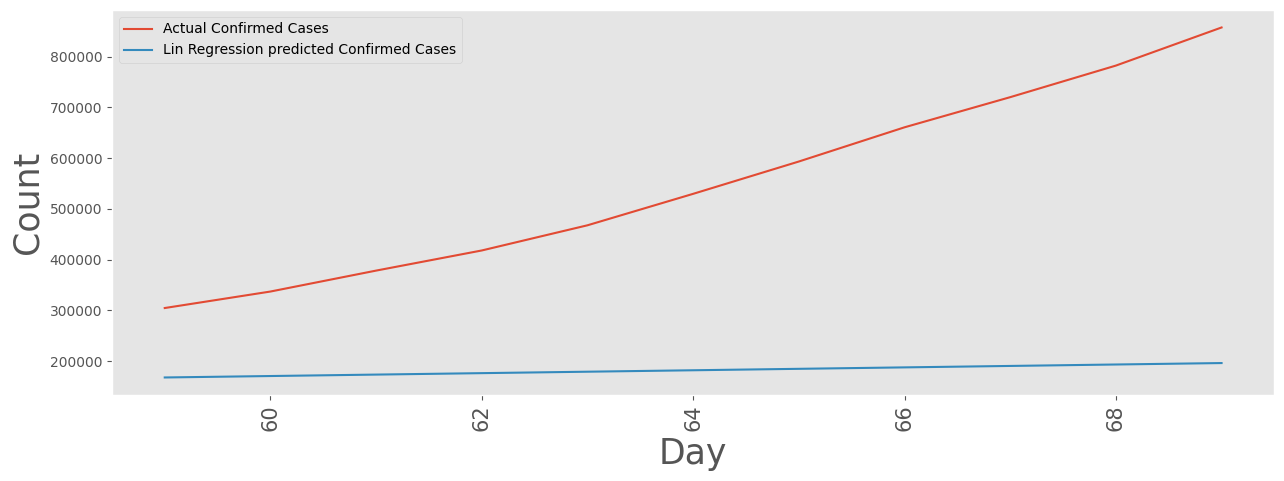

MAE: 181791.423099402
MSE: 33128805402.917187


In [18]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))

I Changed the fit_intercept hyperparameter from False to True for this regression model

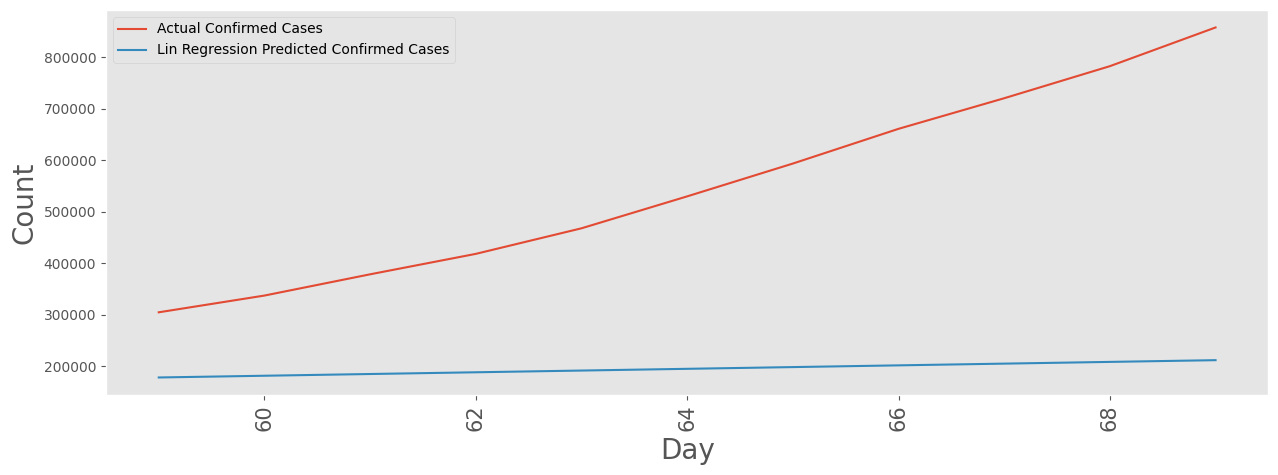

MAE: 355097.09752404224
MSE: 154371404286.4277


In [19]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

lin_model = LinearRegression(fit_intercept=True) #changed to True
lin_model.fit(X_train, y_train)
test_lin_pred = lin_model.predict(X_test)
lin_pred = lin_model.predict(X)

# Plotting
plt.figure(figsize=[15,5])
plt.plot(X_test, y_test, label="Actual Confirmed Cases")
plt.plot(X_test, test_lin_pred, label="Lin Regression Predicted Confirmed Cases")
plt.grid()
plt.legend()
plt.xlabel("Day", size=20)
plt.ylabel("Count", size=20)
plt.xticks(rotation=90, size=15)
plt.show()

# Print performance metrics
print('MAE:', mean_absolute_error(test_lin_pred, y_test))
print('MSE:', mean_squared_error(test_lin_pred, y_test))


**OBSERVATIONS : **
1. **Intercept:**
   - `fit_intercept=True` includes an intercept term in the linear regression model.
   - `fit_intercept=False` assumes a zero intercept.

2. **Baseline Prediction:**
   - `fit_intercept=True` considers a baseline prediction, influencing the starting point of the regression line.

3. **Model Performance:**
   - Changing `fit_intercept` can impact overall model fit.
   - Evaluate metrics (MAE, MSE) for performance before and after the change.

4. **Visual Impact:**
   - Plotting may show a shift in the regression line with the inclusion of an intercept.

5. **Consideration:**
   - Experiment with hyperparameter values based on dataset characteristics.

6. **Evaluation Metrics:**
   - Compare MAE and MSE to assess the impact on predictive accuracy.

7. **Interpretability:**
   - Including an intercept may enhance model interpretability.

These points provide a concise overview of the key considerations when modifying the `fit_intercept` hyperparameter in a linear regression model.

#### Polynomial Regression

In [20]:
poly = PolynomialFeatures(degree=5)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

In [21]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)


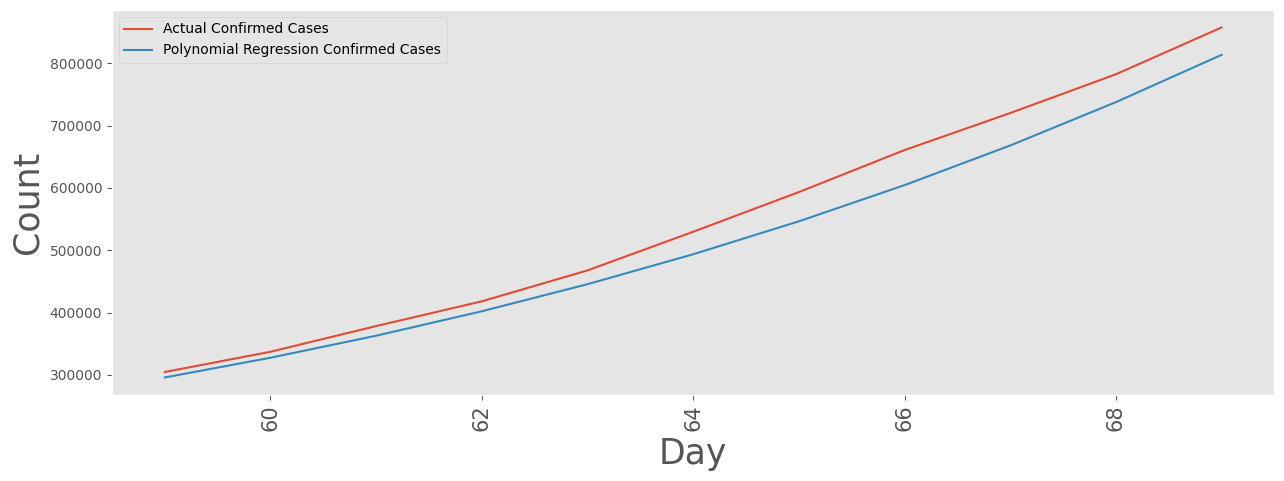

MAE: 31989.752428427022
MSE: 1314905574.5277777


In [22]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_pred,
         label = "Polynomial Regression Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error(test_poly_pred, y_test))
print('MSE:',mean_squared_error(test_poly_pred, y_test))

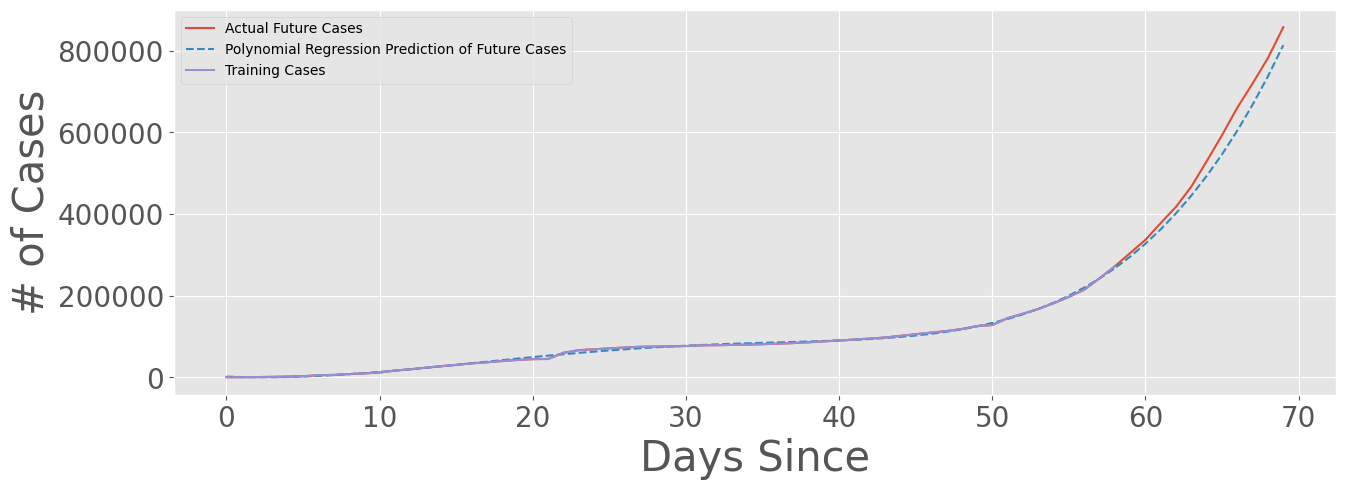

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')

plt.plot(X,
         poly_pred,
         label = 'Polynomial Regression Prediction of Future Cases',
         linestyle = "dashed")

plt.plot(X_train,
         y_train,
         label = 'Training Cases')

plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Changing Hyperparamters for Polynomial Regression :

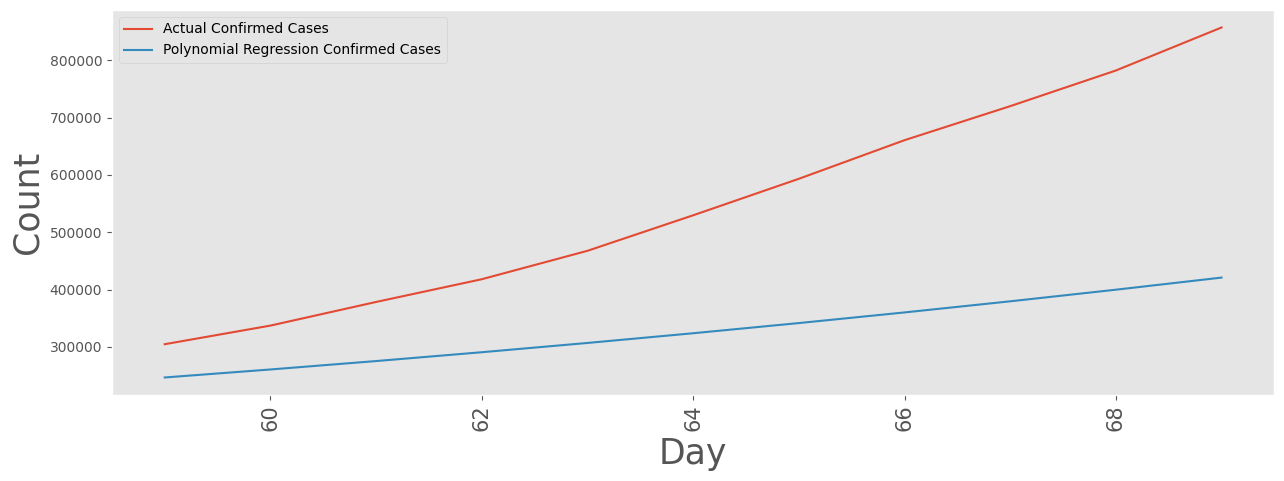

MAE: 222245.25420534256
MSE: 64677604814.41426


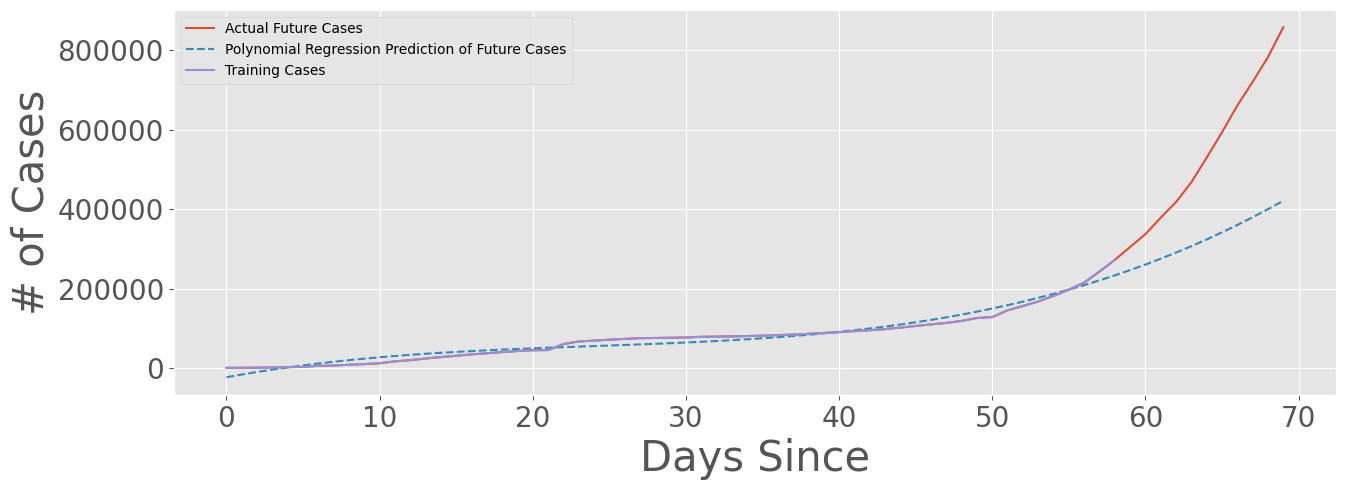

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Change the degree of the polynomial
poly = PolynomialFeatures(degree=3)
poly_X_train = poly.fit_transform(X_train)
poly_X_test  = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

# Change fit_intercept to True
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(poly_X_train, y_train)
test_poly_pred = linear_model.predict(poly_X_test)
poly_pred = linear_model.predict(poly_X)

# Plotting
plt.figure(figsize=[15, 5])
plt.plot(X_test, y_test, label="Actual Confirmed Cases")
plt.plot(X_test, test_poly_pred, label="Polynomial Regression Confirmed Cases")
plt.grid()
plt.legend()
plt.xlabel("Day", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.show()

# Print performance metrics
print('MAE:', mean_absolute_error(test_poly_pred, y_test))
print('MSE:', mean_squared_error(test_poly_pred, y_test))

# Additional plot for comparison
plt.figure(figsize=(15, 5))
plt.plot(X, y, label='Actual Future Cases')
plt.plot(X, poly_pred, label='Polynomial Regression Prediction of Future Cases', linestyle="dashed")
plt.plot(X_train, y_train, label='Training Cases')
plt.xlabel('Days Since', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


**Observations:**
1. **Polynomial Degree (5 to 3):**
   - **Effect:** Changes model flexibility.
   - **Visual Impact:** Smoother curve in COVID-19 cases plot.

2. **`fit_intercept` (False to True):**
   - **Effect:** Adds baseline prediction.
   - **Visual Impact:** Alters starting point of the COVID-19 cases curve.

3. **Performance Metrics:**
   - **Impact:** Affects model accuracy.
   - **Evaluation:** MAE and MSE reflect COVID-19 cases prediction.

4. **Visual Comparison:**
   - **Impact:** Highlights differences in predicted and actual COVID-19 cases.

### 9.2 Ridge Regression

In [25]:
tol      = [1e-4, 1e-3, 1e-2]
alpha_1  = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2  = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2' : alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2' : lambda_2 }

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

bayesian_search.fit(X_train, y_train)

print(bayesian_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.0001, 'lambda_2': 1e-07, 'lambda_1': 0.0001, 'alpha_2': 1e-05, 'alpha_1': 1e-07}


In [26]:
y_test_ridge_pred = bayesian_search.predict(X_test);
y_ridge_pred = bayesian_search.predict(X);

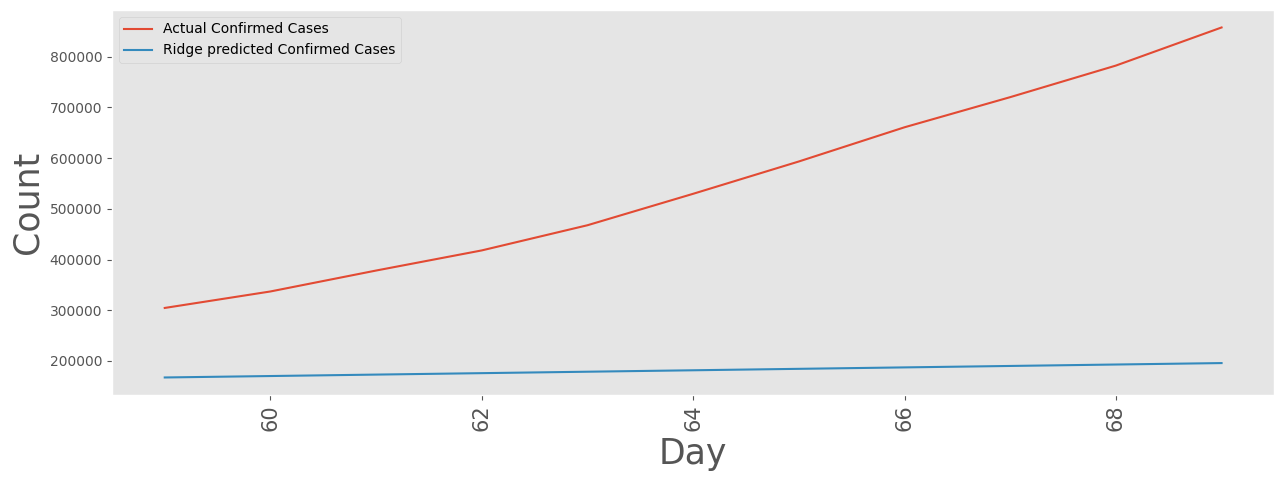

MAE: 181588.76120723973
MSE: 33054982293.94005


In [27]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         y_test_ridge_pred,
         label = "Ridge predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15);
plt.show()

print('MAE:', mean_absolute_error (y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error  (y_test_ridge_pred, X_test))

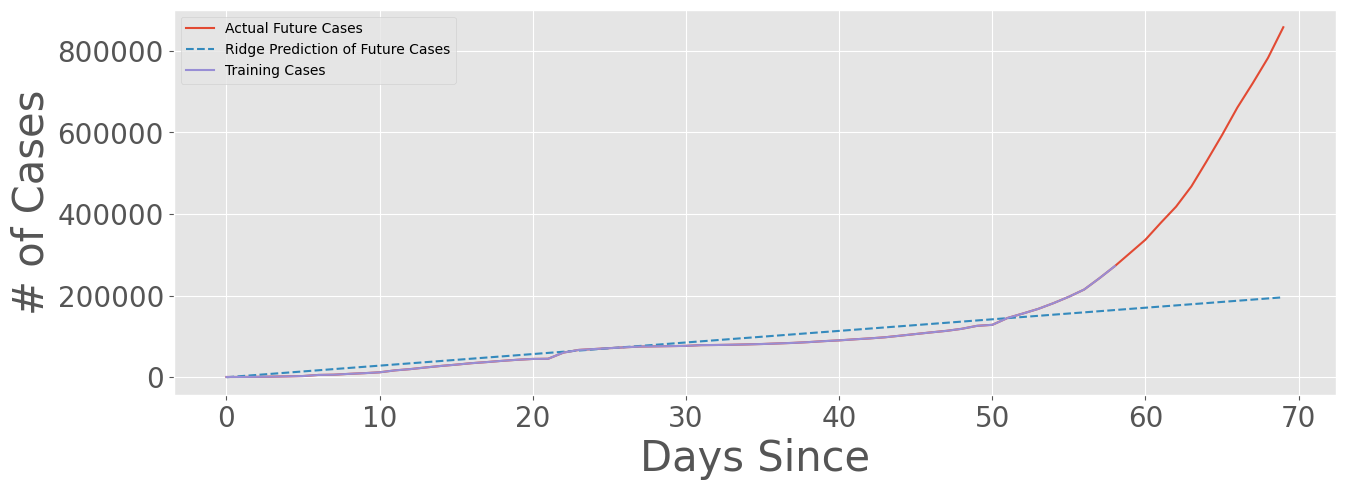

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label = 'Ridge Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Done some changes in Hyperparameters for Ridge Regression :

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 14, 'lambda_2': 15, 'lambda_1': 13, 'alpha_2': 15, 'alpha_1': 15}


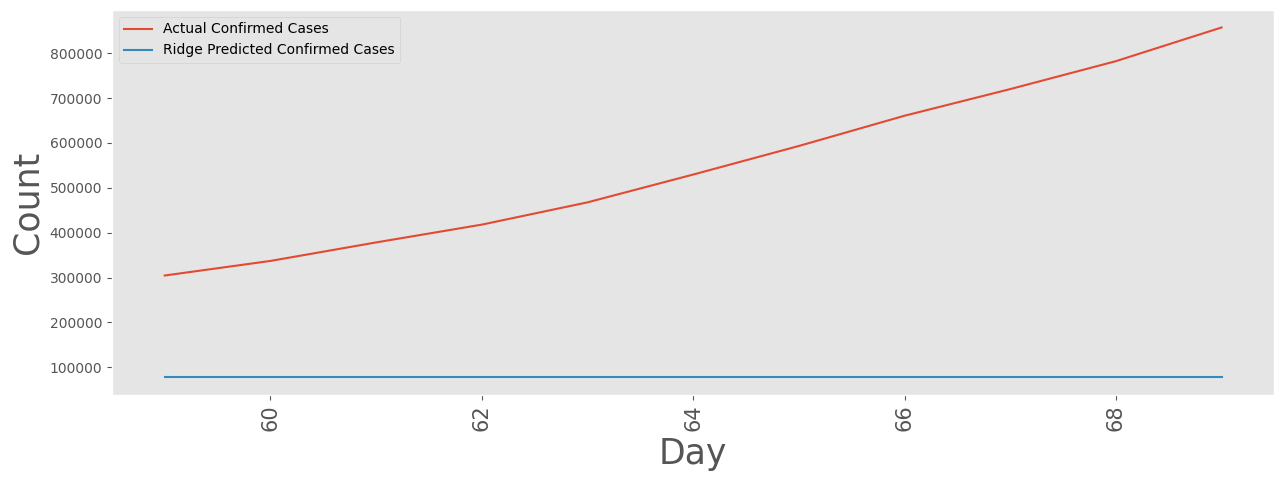

MAE: 77159.2876295663
MSE: 5953555676.976833


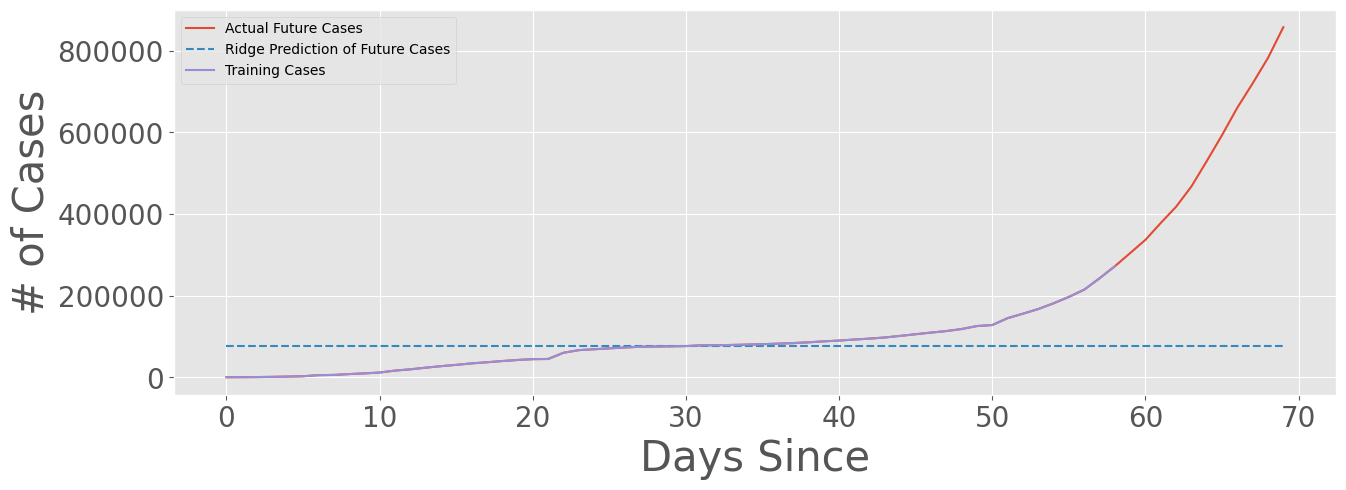

In [29]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Updated hyperparameters
tol      = [10, 14, 12]  # Modified tolerance
alpha_1  = [11, 15, 11]  # Modified alpha_1
alpha_2  = [12, 16, 15]  # Modified alpha_2
lambda_1 = [13, 16, 14]  # Modified lambda_1
lambda_2 = [14, 15, 13]  # Modified lambda_2

# Updated Bayesian grid
bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2': alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2': lambda_2}

# Instantiate Bayesian Ridge with fit_intercept=True
bayesian = BayesianRidge(fit_intercept=True)  # Change fit_intercept to True

# Use RandomizedSearchCV with updated grid
bayesian_search = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)

# Fit the model with updated hyperparameters
bayesian_search.fit(X_train, y_train)

# Print the best hyperparameters
print(bayesian_search.best_params_)

# Use the best model to make predictions
y_test_ridge_pred = bayesian_search.predict(X_test)
y_ridge_pred = bayesian_search.predict(X)

# Plotting the results
plt.figure(figsize=[15, 5])
plt.plot(X_test, y_test, label="Actual Confirmed Cases")
plt.plot(X_test, y_test_ridge_pred, label="Ridge Predicted Confirmed Cases")
plt.grid()
plt.legend()
plt.xlabel("Day", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.show()

# Print performance metrics
print('MAE:', mean_absolute_error(y_test_ridge_pred, X_test))
print('MSE:', mean_squared_error(y_test_ridge_pred, X_test))

# Additional plot for comparison
plt.figure(figsize=(15, 5))
plt.plot(X, y, label='Actual Future Cases')
plt.plot(X, y_ridge_pred, label='Ridge Prediction of Future Cases', linestyle="dashed")
plt.plot(X_train, y_train, label='Training Cases')
plt.xlabel('Days Since', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


#### Polynomial Ridge Regression

In [30]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                     bayesian_grid,
                                     scoring='neg_mean_squared_error',
                                     cv=3,
                                     return_train_score=True,
                                     n_jobs=-1,
                                     n_iter=40,
                                     verbose=1)


In [31]:
bayesian_search_poly.fit(poly_X_train, y_train);
print(bayesian_search_poly.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 12, 'lambda_2': 13, 'lambda_1': 16, 'alpha_2': 15, 'alpha_1': 11}


In [32]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)

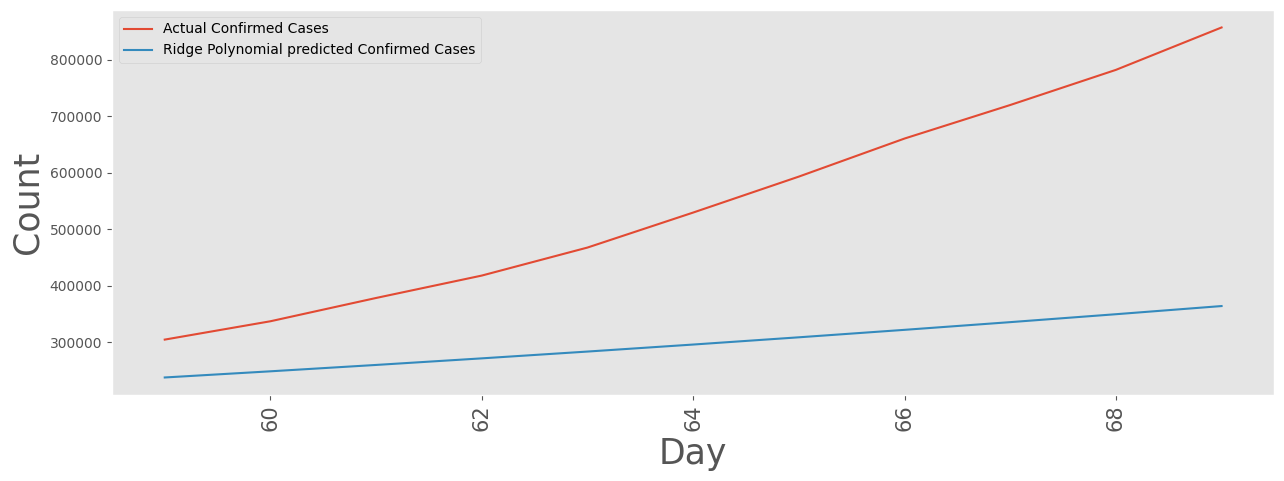

MAE: 252163.22419386412
MSE: 82852921543.04123


In [33]:
plt.figure(figsize = [15,5])

# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")

# plotting the predicited values for the future days
plt.plot(X_test,
         test_poly_bayesian_pred,
         label = "Ridge Polynomial predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print ('MAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('MSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

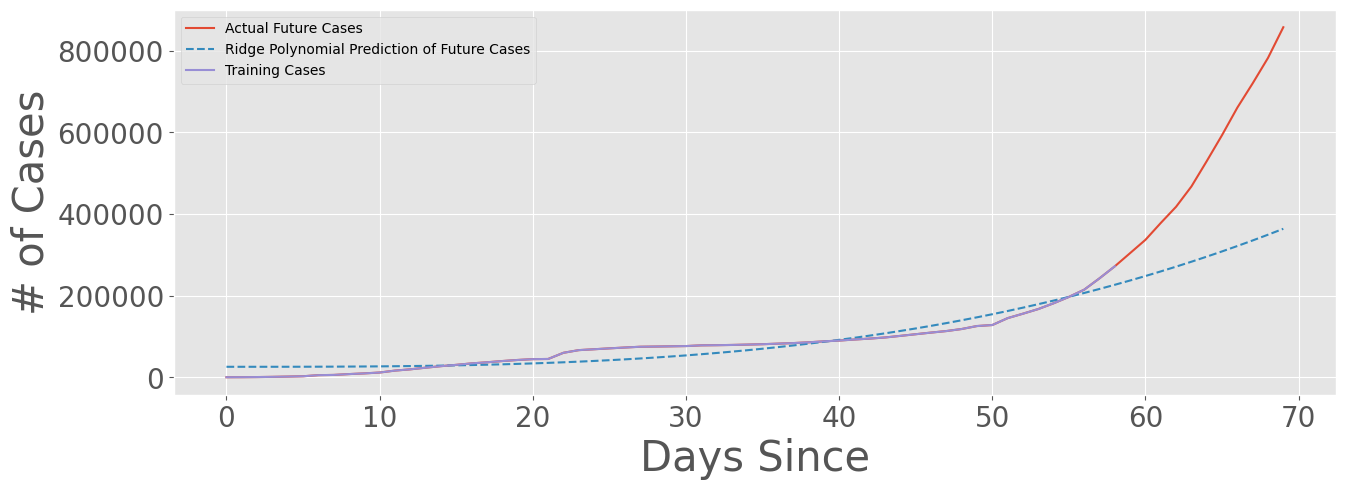

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label = 'Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label = 'Ridge Polynomial Prediction of Future Cases',
         linestyle = "dashed")
plt.plot(X_train,
         y_train,
         label = 'Training Cases')

#plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since', size = 30)
plt.ylabel('# of Cases', size = 30)
#plt.grid()
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [35]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:',mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print ('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print ('\tMSE:', mean_squared_error (test_poly_bayesian_pred, y_test))

Polynomial Regression 
	MAE: 222245.25420534256
	MSE: 64677604814.41426

Ridge Polynomial Regression 
	MAE: 252163.22419386412
	MSE: 82852921543.04123


From Mean Absolute Error and Mean Squared Error values, Ridge Polynomial Regression Model seems to be the best model.

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 1e-06, 'lambda_2': 1e-07, 'lambda_1': 1e-07, 'alpha_2': 1e-07, 'alpha_1': 1e-09}


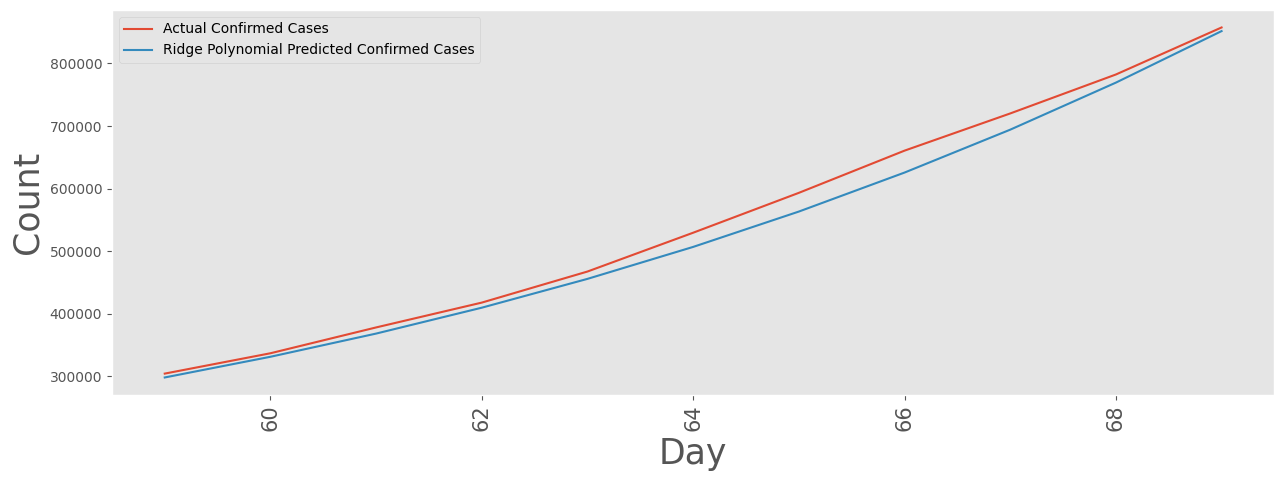

Polynomial Ridge Regression Metrics:
	MAE: 15796.250911553348
	MSE: 352570991.0204375


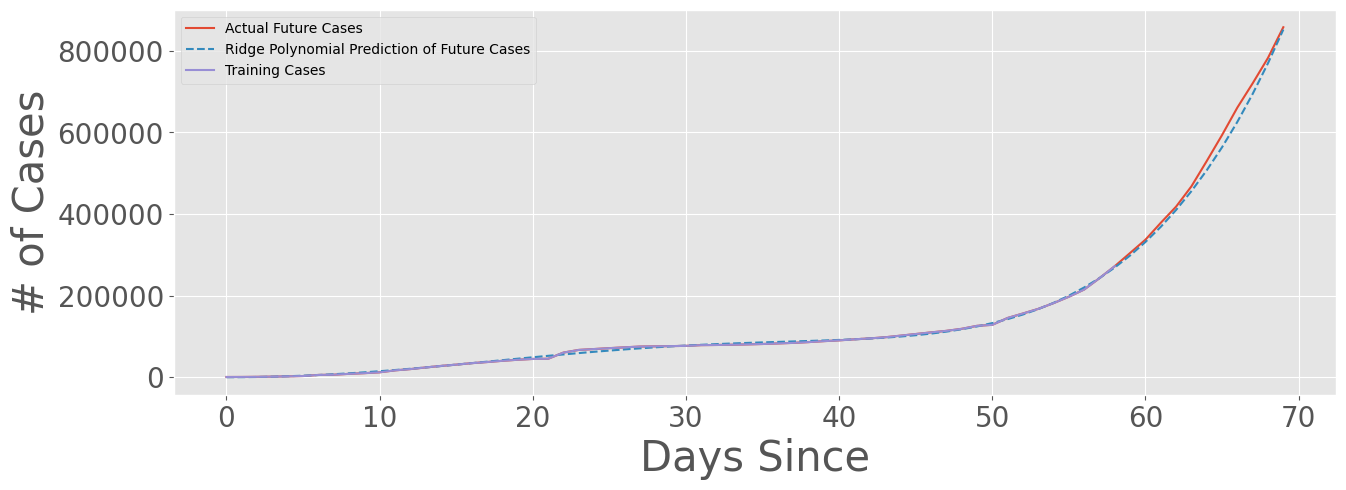

In [36]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Polynomial degree and features
degree = 5
poly = PolynomialFeatures(degree=degree)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_X = poly.fit_transform(X)

# Expanded hyperparameter grid for Bayesian Ridge
tol = [1e-6, 1e-5, 1e-4]  # Adjusted tolerance
alpha_1 = [1e-9, 1e-8, 1e-7]  # Adjusted alpha_1
alpha_2 = [1e-9, 1e-8, 1e-7]  # Adjusted alpha_2
lambda_1 = [1e-9, 1e-8, 1e-7]  # Adjusted lambda_1
lambda_2 = [1e-9, 1e-8, 1e-7]  # Adjusted lambda_2

# Updated Bayesian grid
bayesian_grid = {'tol': tol,
                 'alpha_1': alpha_1,
                 'alpha_2': alpha_2,
                 'lambda_1': lambda_1,
                 'lambda_2': lambda_2}

# Instantiate Bayesian Ridge with fit_intercept=False
bayesian = BayesianRidge(fit_intercept=False)

# Use RandomizedSearchCV with updated grid
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                          bayesian_grid,
                                          scoring='neg_mean_squared_error',
                                          cv=3,
                                          return_train_score=True,
                                          n_jobs=-1,
                                          n_iter=40,
                                          verbose=1)

# Fit the model with updated hyperparameters
bayesian_search_poly.fit(poly_X_train, y_train)

# Print the best hyperparameters
print(bayesian_search_poly.best_params_)

# Use the best model to make predictions
test_poly_bayesian_pred = bayesian_search_poly.predict(poly_X_test)
bayesian_poly_pred = bayesian_search_poly.predict(poly_X)

# Plotting the results
plt.figure(figsize=[15, 5])
plt.plot(X_test, y_test, label="Actual Confirmed Cases")
plt.plot(X_test, test_poly_bayesian_pred, label="Ridge Polynomial Predicted Confirmed Cases")
plt.grid()
plt.legend()
plt.xlabel("Day", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.show()

# Print performance metrics for Polynomial Ridge Regression
print('Polynomial Ridge Regression Metrics:')
print('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print('\tMSE:', mean_squared_error(test_poly_bayesian_pred, y_test))

# Additional plot for comparison
plt.figure(figsize=(15, 5))
plt.plot(X, y, label='Actual Future Cases')
plt.plot(X, bayesian_poly_pred, label='Ridge Polynomial Prediction of Future Cases', linestyle="dashed")
plt.plot(X_train, y_train, label='Training Cases')
plt.xlabel('Days Since', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
